# Machine Learning Lab 4
Logistic Regression

**Name:** Fatima Mujahid

**Class:** BESE-10B

**CMS ID:** 289558

**Date:** March 17, 2022

# ML using PyTorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It is free and open-source software released under the Modified BSD license

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

Go through the following link to learn the basics of Tensors in Pytorch:
https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html

## Linear Regression Using Pytorch

In [28]:
from numpy import loadtxt
import numpy as np
import torch
from torch import nn
from torchvision import transforms
import torch.optim as optim


# Load the datasets
np_data = loadtxt('ex1data1.txt', delimiter=',')

# convert np array to pytorch tensor
X = torch.from_numpy((np_data[:,np.newaxis,0]).astype('float32'))
Y = torch.from_numpy(np_data[:,np.newaxis,1].astype('float32'))

# Linear regression hypothesis using Pytorch
hypothesis = nn.Linear(X.shape[1], 1, bias=True) # h = w x + b

optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

J_history = []
for iterations in range(200):
    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X)
    
    loss = Cost(out, Y)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]



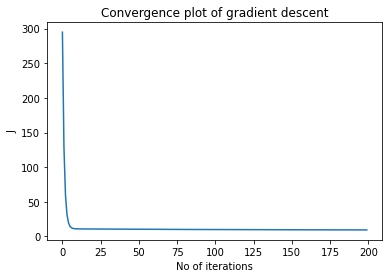

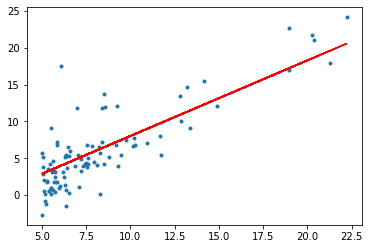

In [29]:
# plot the results
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()
plt.plot(X,Y,'.')
plt.plot(X[:, 0], out.detach().numpy(), c = 'r')

## Multiclass Logistic Regression using Pytorch (softmax classification)

Reading assignment: Go through the following

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html
https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

Mini batch gradient descent:

https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

In [30]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder

# Load the classification dataset (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
np_data = datasets.load_iris()

# convert np array to pytorch tensor
X = torch.from_numpy((np_data.data).astype('float32'))
Y = torch.from_numpy((np_data.target.astype('int64')))


# Logistic regression hypothesis using Pytorch
hypothesis = nn.Sequential(
    nn.Linear(X.shape[1], 3, bias=True), 
    nn.LogSoftmax(dim=1)) 
    
optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.NLLLoss() # Negative log likelihood loss

J_history = []
for iterations in range(200):
    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X)
    
    loss = Cost(out, Y)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]
    

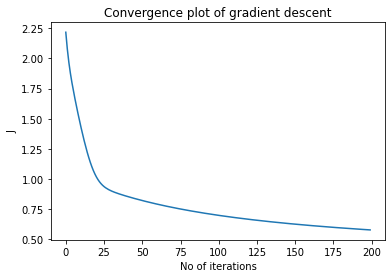

In [31]:
# plot the results
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()

# Lab Task
## Logistic Regression on MNIST Handwritten Digit 
Apply logistic regression to mnist handwritten digits. Use the code in the previous cell as the starter code. There are 10 classes so the number of out_feature in nn.Linear will be 10. Set the in_features according to the dimension of vectorised image. Plot the convergence plot of gradiet descent.

Note: Do not use convolution or Deep neural network. Use vectorised image as input. Use multiclass logistic regression model as studied in the class and implemented in the previous cell. 

### 1. Load the MNIST data
Follow the guidelines here to download and use MNIST data
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [32]:
# use the following imports to download MNIST using Pytorch 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets

#todo: 
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

batch_size = 32

train_loader = torch.utils.data.DataLoader(
    dataset=training_data, 
    batch_size=batch_size, 
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_data, 
    batch_size=batch_size, 
    shuffle = True
)


### 2.  Create a multiclass logistic regression (softmax) model and train

In [33]:
# Create softmax model. in_features = 28x28 and out_features = 10
# todo:

# Logistic regression hypothesis using Pytorch
hypothesis = nn.Sequential(
    nn.Linear(28*28, 10, bias=True), 
    nn.LogSoftmax(dim=1)) 
    
optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.NLLLoss() # Negative log likelihood loss

J_history = []
iter = 0

for epoch in range(10):
  for i, (images, labels) in enumerate(train_loader):
    X_train = images.view(-1, 28*28)
    y_train = labels

    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X_train)
  
    loss = Cost(out, y_train)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]
    iter += 1

    if iter % 500 == 0: 
      print('Iteration: {} Loss: {}'.format(iter, loss.item()))


Iteration: 500 Loss: 0.8374409675598145
Iteration: 1000 Loss: 0.5166006684303284
Iteration: 1500 Loss: 0.3163786828517914
Iteration: 2000 Loss: 0.4603278636932373
Iteration: 2500 Loss: 0.3347112238407135
Iteration: 3000 Loss: 0.495540589094162
Iteration: 3500 Loss: 0.23230911791324615
Iteration: 4000 Loss: 0.6872785091400146
Iteration: 4500 Loss: 0.4466838240623474
Iteration: 5000 Loss: 0.4709649682044983
Iteration: 5500 Loss: 0.6521487832069397
Iteration: 6000 Loss: 0.1574934422969818
Iteration: 6500 Loss: 0.38926979899406433
Iteration: 7000 Loss: 0.21035437285900116
Iteration: 7500 Loss: 0.19804690778255463
Iteration: 8000 Loss: 0.5305366516113281
Iteration: 8500 Loss: 0.291789710521698
Iteration: 9000 Loss: 0.34136465191841125
Iteration: 9500 Loss: 0.1145160123705864
Iteration: 10000 Loss: 0.7653738260269165
Iteration: 10500 Loss: 0.3328002989292145
Iteration: 11000 Loss: 0.1646125763654709
Iteration: 11500 Loss: 0.46528884768486023
Iteration: 12000 Loss: 0.3075854182243347
Iteratio

### 3. Plot Convergence plot of gradient descent with respect to no of epochs

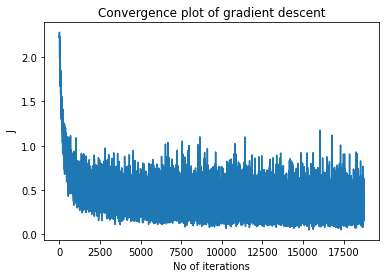

In [34]:
# each of 10 epochs consists of 1875 iterations (train_data/batch_size = 60000/32)

from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()

### 4. Test on a batch of test images and display images with the predicted label

TEST: 1


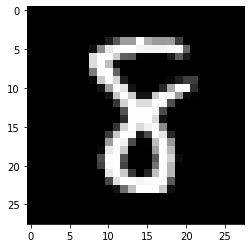

PREDICTION: 8
LABEL FOR IMAGE: 8

TEST: 2


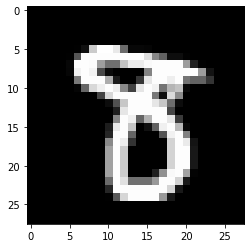

PREDICTION: 3
LABEL FOR IMAGE: 8

TEST: 3


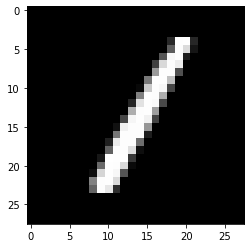

PREDICTION: 1
LABEL FOR IMAGE: 1

TEST: 4


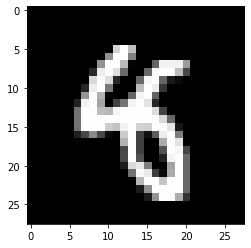

PREDICTION: 4
LABEL FOR IMAGE: 8

TEST: 5


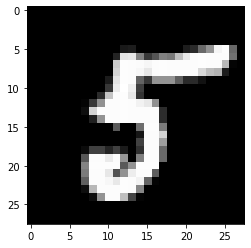

PREDICTION: 5
LABEL FOR IMAGE: 5

TEST: 6


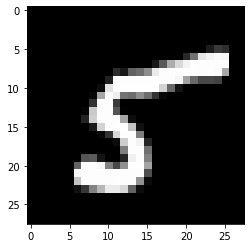

PREDICTION: 5
LABEL FOR IMAGE: 5

TEST: 7


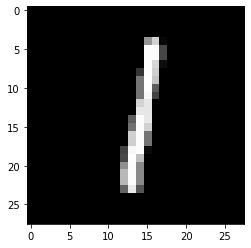

PREDICTION: 1
LABEL FOR IMAGE: 1

TEST: 8


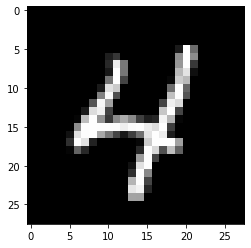

PREDICTION: 4
LABEL FOR IMAGE: 4

TEST: 9


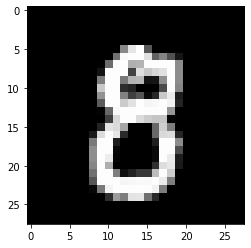

PREDICTION: 8
LABEL FOR IMAGE: 8

TEST: 10


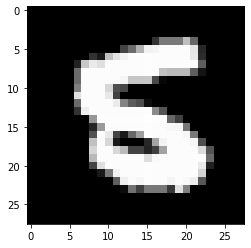

PREDICTION: 5
LABEL FOR IMAGE: 5

TEST: 11


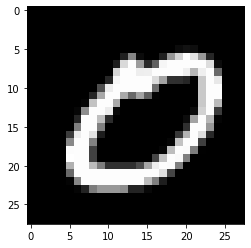

PREDICTION: 0
LABEL FOR IMAGE: 0

TEST: 12


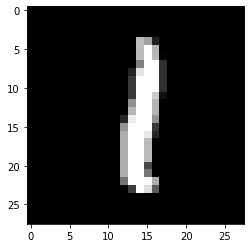

PREDICTION: 1
LABEL FOR IMAGE: 1

TEST: 13


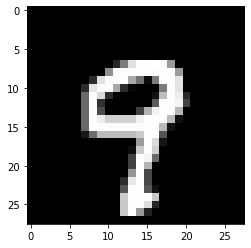

PREDICTION: 9
LABEL FOR IMAGE: 9

TEST: 14


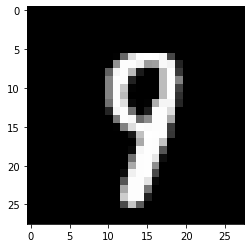

PREDICTION: 9
LABEL FOR IMAGE: 9

TEST: 15


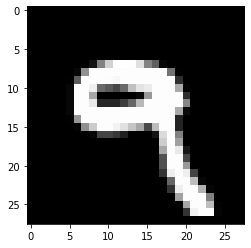

PREDICTION: 9
LABEL FOR IMAGE: 9

TEST: 16


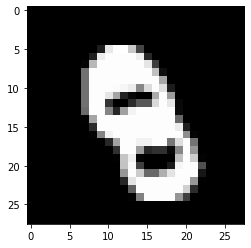

PREDICTION: 8
LABEL FOR IMAGE: 8

TEST: 17


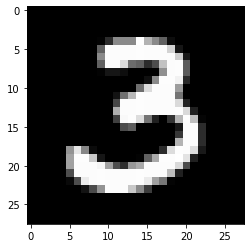

PREDICTION: 3
LABEL FOR IMAGE: 3

TEST: 18


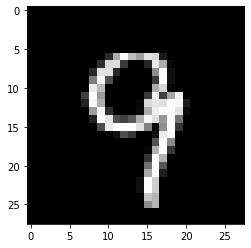

PREDICTION: 9
LABEL FOR IMAGE: 9

TEST: 19


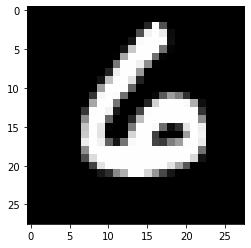

PREDICTION: 6
LABEL FOR IMAGE: 6

TEST: 20


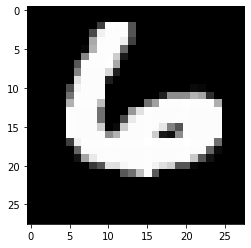

PREDICTION: 6
LABEL FOR IMAGE: 6

TEST: 21


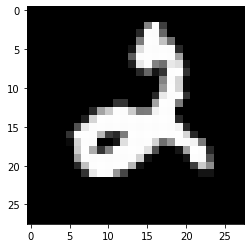

PREDICTION: 2
LABEL FOR IMAGE: 2

TEST: 22


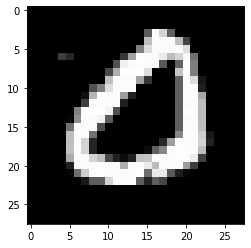

PREDICTION: 0
LABEL FOR IMAGE: 0

TEST: 23


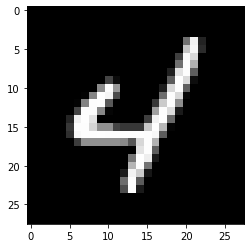

PREDICTION: 4
LABEL FOR IMAGE: 4

TEST: 24


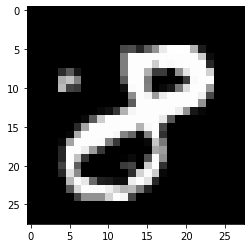

PREDICTION: 3
LABEL FOR IMAGE: 8

TEST: 25


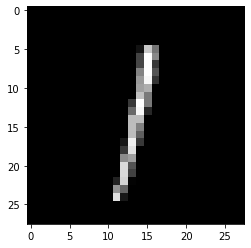

PREDICTION: 1
LABEL FOR IMAGE: 1

TEST: 26


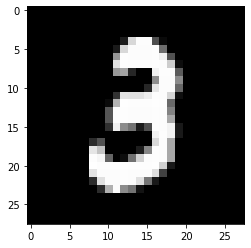

PREDICTION: 3
LABEL FOR IMAGE: 3

TEST: 27


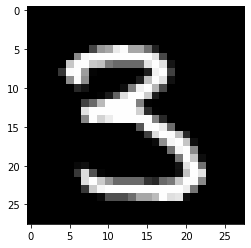

PREDICTION: 3
LABEL FOR IMAGE: 3

TEST: 28


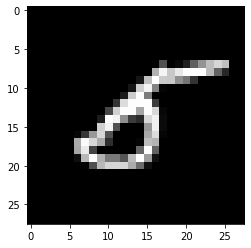

PREDICTION: 5
LABEL FOR IMAGE: 5

TEST: 29


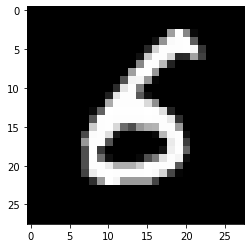

PREDICTION: 6
LABEL FOR IMAGE: 6

TEST: 30


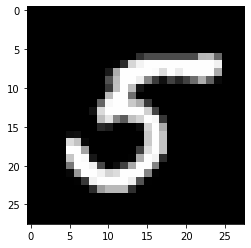

PREDICTION: 5
LABEL FOR IMAGE: 5

TEST: 31


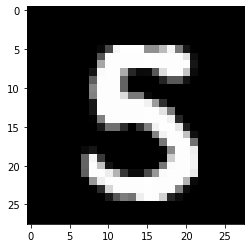

PREDICTION: 5
LABEL FOR IMAGE: 5

TEST: 32


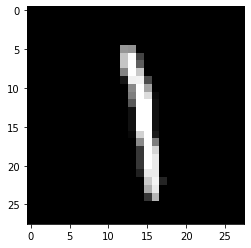

PREDICTION: 1
LABEL FOR IMAGE: 1

ACCURACY FOR BATCH 1: 90.625


In [35]:
import matplotlib.pyplot as plt

k=0
correct = 0
total = 0

for i, (images, labels) in enumerate(test_loader):
  X_test = images.view(-1, 28*28)
  y_test = labels

  with torch.no_grad():
    out = hypothesis(X_test)
    values, pred = torch.max(out.data, 1)
    correct += (pred == y_test).sum()
    total += y_test.size(0) 
  
  if i == 0:
    for j in range(len(pred)):
      k += 1

      print('TEST:', k)
      plt.imshow(images[j].reshape((28, 28)), cmap="gray")
      plt.pause(0.00001)  

      print('PREDICTION:', pred[j].item())
      print('LABEL FOR IMAGE:', y_test[j].item())
      print()
    print('ACCURACY FOR BATCH 1:', 100 * ((pred == y_test).sum()/y_test.size(0)).item())


In [36]:
accuracy = 100 * correct.item() / total
print('ACCURACY:', accuracy)


ACCURACY: 91.71
